<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/ML2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/AutoInsurance.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
data['Marital Status'].unique()
data['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [ ]:
data.isnull().sum()

,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


In [ ]:

data['Effective To Date']=pd.to_datetime(data['Effective To Date'])
data['Effective day']=data['Effective To Date'].dt.day
data['Effective month']=data['Effective To Date'].dt.month
data['effective_dayofweek'] = data['Effective To Date'].dt.dayofweek
data=data.drop('Effective To Date',axis=1)
data=data.drop('Customer',axis=1)

<ipython-input-40-61f7b46e7216>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Effective To Date']=pd.to_datetime(data['Effective To Date'])


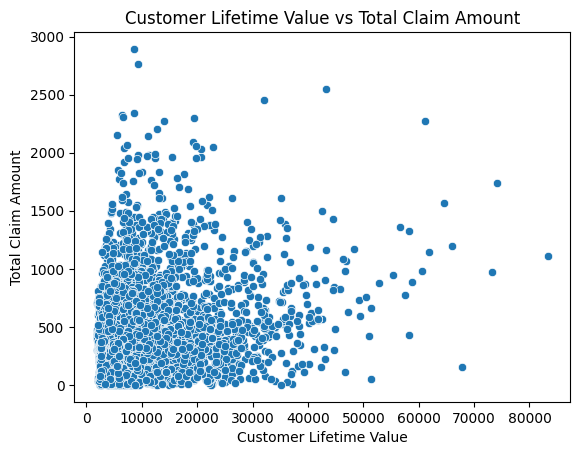

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


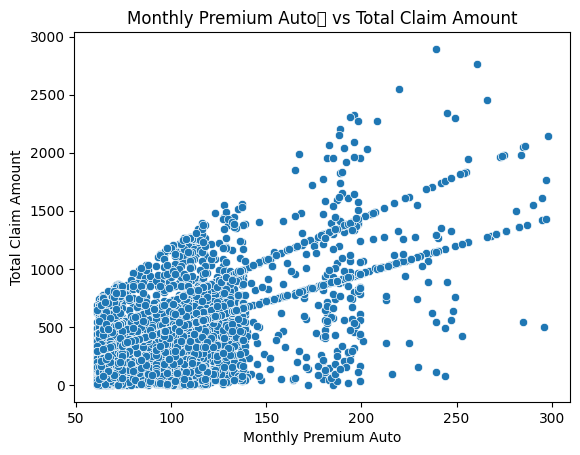

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


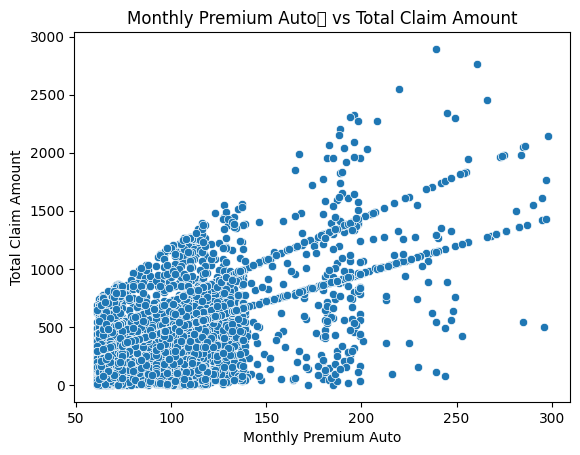

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=data,x='Customer Lifetime Value',y='Total Claim Amount')
plt.title('Customer Lifetime Value vs Total Claim Amount')
plt.show()
sns.scatterplot(data=data,x='Monthly Premium Auto',y='Total Claim Amount')
plt.title('Monthly Premium Auto	 vs Total Claim Amount')
plt.show()

sns.scatterplot(data=data,x='Monthly Premium Auto',y='Total Claim Amount')
plt.title('Monthly Premium Auto	 vs Total Claim Amount')
plt.show()


In [ ]:
num=data.select_dtypes(include=[int,float])
num.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective day,Effective month,effective_dayofweek
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,0.003201,-0.007444,0.008417
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,-0.032119,0.017982,0.020162
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,-0.009217,0.002178,0.025062
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,0.021015,-0.009089,0.009767
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,-0.014521,0.003329,-0.020578
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,0.028473,-0.025711,0.003435
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.008615,-0.015183,-0.015927
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.000484,-0.015363,0.022004
Effective day,0.003201,-0.032119,-0.009217,0.021015,-0.014521,0.028473,0.008615,0.000484,1.000000,-0.694454,-0.018634
Effective month,-0.007444,0.017982,0.002178,-0.009089,0.003329,-0.025711,-0.015183,-0.015363,-0.694454,1.000000,0.017431


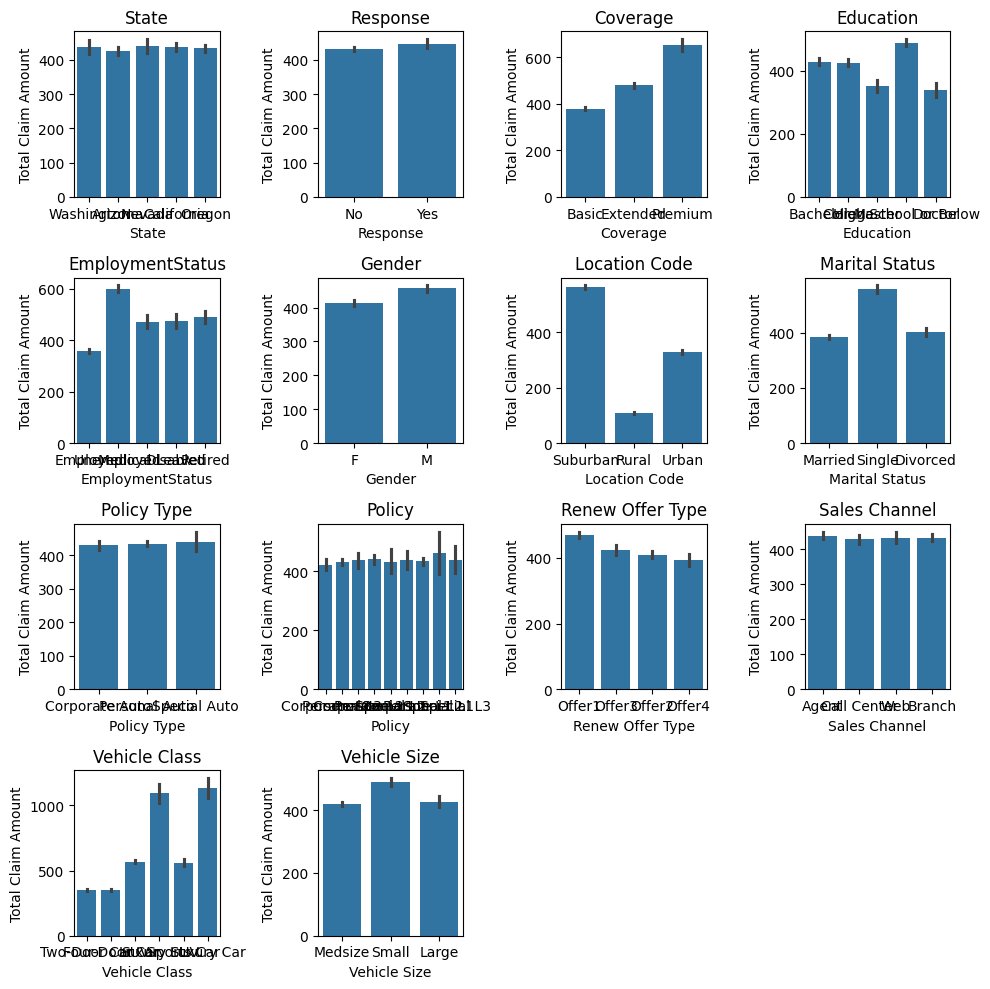

In [ ]:
cat=data.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(10,10))
for i in cat:
  plt.subplot(4,4,cat.index(i)+1)
  sns.barplot(data=data,x=i,y='Total Claim Amount')
  plt.title(i)
  plt.tight_layout()
plt.show()



In [ ]:
data.drop('State',axis=1,inplace=True)
data.drop('Response',axis=1,inplace=True)
data.drop('Policy Type',axis=1,inplace=True)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Effective day', 'Effective month', 'effective_dayofweek']


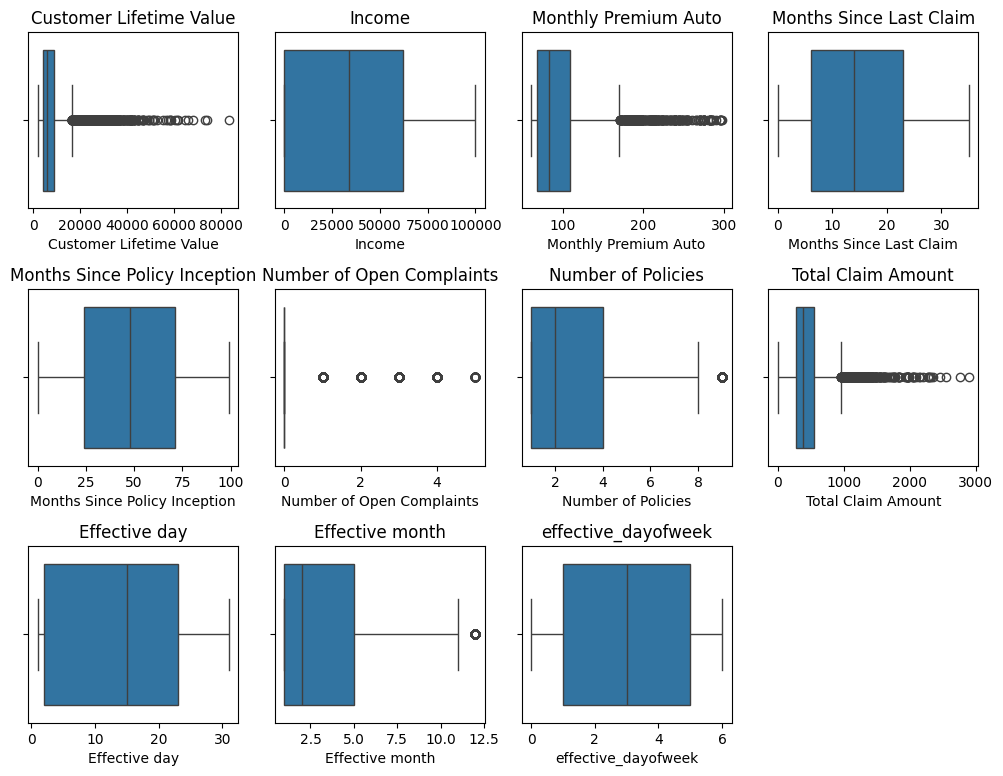

In [ ]:
nums=data.select_dtypes(include=[int,float]).columns.tolist()
print(nums)
plt.figure(figsize=(10,10))
for i in range(len(nums)):
  plt.subplot(4,4,i+1)
  sns.boxplot(data=data,x=nums[i])
  plt.title(nums[i])
  plt.tight_layout()
plt.show()

In [ ]:
def outliers(data,column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr=q3-q1
  l=q1-1.5*iqr
  u=q3+1.5*iqr
  print(l,u)
  data[column]=np.where(data[column]<l,l,np.where(data[column]>u,u,data[column]))
for i in range(len(nums)):
  outliers(data,nums[i])

-3457.6210762500014 16414.039911750002
-93480.0 155800.0
6.5 170.5
-19.5 48.5
-46.5 141.5
0.0 0.0
-3.5 8.5
-140.62664687499995 960.3997301249999
-29.5 54.5
-5.0 11.0
-5.0 11.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
la=['Vehicle Size','Coverage']
for i in la:
  data[i]=le.fit_transform(data[i])
data=pd.get_dummies(data,columns=['Education','Location Code','EmploymentStatus','Gender','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class'],drop_first=True)


In [ ]:
data['Income'] = np.log1p(data['Income'])
data['Customer Lifetime Value'] = np.log1p(data['Customer Lifetime Value'])


In [ ]:

data = data.astype({col: 'int' for col in data.select_dtypes('bool').columns})




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data.drop('Total Claim Amount',axis=1)
y=data['Total Claim Amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([180.20310922, 457.53191231, 481.36025642, ..., 206.88302935,
       484.8710715 , 601.9251762 ])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 81.66719144193814
RMSE: 105.19920105591478
R² Score: 0.8031832766431878
